# **Import librares**

In [ ]:
!pip install Keras-Preprocessing
import numpy as np
import pandas as pd
import nltk
import tensorflow as tf
from nltk.corpus import stopwords
from nltk.corpus import reuters
from nltk.corpus import brown
from nltk.corpus import gutenberg
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle
from collections import Counter
from textblob import Word 
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.model_selection import KFold 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras_preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.layers import Activation, Dense, Embedding, LSTM, SpatialDropout1D, Dropout, Flatten, GRU, Conv1D, MaxPooling1D, Bidirectional
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests
!pip install ktrain
import ktrain
from ktrain import text
sns.set()
%matplotlib inline
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('gutenberg')
nltk.download('brown')
nltk.download("reuters")
nltk.download('words')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 4.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.5/104.5 KB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 KB 13.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 65.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 66.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.0/266.0 KB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 106.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

### **Load Dataset**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Twitter_Suicide_Dataset.csv", engine='python', encoding='UTF-8')
df=df.replace('Potential Suicide post ','Potential Suicide post')
df

,Tweet,Suicide
0,making some lunch,Not Suicide post
1,@Alexia You want his money.,Not Suicide post
2,@dizzyhrvy that crap took me forever to put to...,Potential Suicide post
3,@jnaylor #kiwitweets Hey Jer! Since when did y...,Not Suicide post
4,Trying out &quot;Delicious Library 2&quot; wit...,Not Suicide post
...,...,...
1782,i have forgotten how much i love my Nokia N95-1,Not Suicide post
1783,Starting my day out with a positive attitude! ...,Not Suicide post
1784,"@belledame222 Hey, it's 5 am...give a girl som...",Not Suicide post
1785,2 drunken besties stumble into my room and we ...,Not Suicide post


# **Data Cleaning**

In [ ]:
df['Tweet']=df['Tweet'].fillna("") 
df.isna().sum()

Tweet      0
Suicide    0
dtype: int64

# **Preprocessing**

In [ ]:
#Convert to lower case
df['lower_case']= df['Tweet'].apply(lambda x: x.lower())   
#Tokenize
tokenizer = RegexpTokenizer(r'\w+')
df['Special_word'] = df.apply(lambda row: tokenizer.tokenize(row['lower_case']), axis=1)  
#Stop words remove
stop = stopwords.words('english')
stop.remove("not")
stop.remove("here")
stop.remove("some")
df['stop_words'] = df['Special_word'].apply(lambda x: [item for item in x if item not in stop])
df['stop_words'] = df['stop_words'].astype('str')
#Filter words based on length
df['short_word'] = df['stop_words'].str.findall('\w{3,}')
df['string']=df['short_word'].str.join(' ') 
#Removing non-english words(mention,emoji,link,special characters etc..)
words = set(nltk.corpus.words.words())
for w in reuters.words():
  words.add(w)
for w in brown.words():
  words.add(w)
for w in gutenberg.words():
  words.add(w)
df['NonEnglish'] = df['string'].apply(lambda x: " ".join(x for x in x.split() if x in words))  
#Lemmatization
df['tweet'] = df['NonEnglish'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 

In [ ]:
df.head(5)

,Tweet,Suicide,lower_case,Special_word,stop_words,short_word,string,NonEnglish,tweet
0,making some lunch,Not Suicide post,making some lunch,"[making, some, lunch]","['making', 'some', 'lunch']","[making, some, lunch]",making some lunch,making some lunch,making some lunch
1,@Alexia You want his money.,Not Suicide post,@alexia you want his money.,"[alexia, you, want, his, money]","['alexia', 'want', 'money']","[alexia, want, money]",alexia want money,alexia want money,alexia want money
2,@dizzyhrvy that crap took me forever to put to...,Potential Suicide post,@dizzyhrvy that crap took me forever to put to...,"[dizzyhrvy, that, crap, took, me, forever, to,...","['dizzyhrvy', 'crap', 'took', 'forever', 'put'...","[dizzyhrvy, crap, took, forever, put, together...",dizzyhrvy crap took forever put together going...,crap took forever put together going sleep days,crap took forever put together going sleep day
3,@jnaylor #kiwitweets Hey Jer! Since when did y...,Not Suicide post,@jnaylor #kiwitweets hey jer! since when did y...,"[jnaylor, kiwitweets, hey, jer, since, when, d...","['jnaylor', 'kiwitweets', 'hey', 'jer', 'since...","[jnaylor, kiwitweets, hey, jer, since, start, ...",jnaylor kiwitweets hey jer since start twittering,hey since start twittering,hey since start twittering
4,Trying out &quot;Delicious Library 2&quot; wit...,Not Suicide post,trying out &quot;delicious library 2&quot; wit...,"[trying, out, quot, delicious, library, 2, quo...","['trying', 'quot', 'delicious', 'library', '2'...","[trying, quot, delicious, library, quot, mixed...",trying quot delicious library quot mixed resul...,trying quot delicious library quot mixed resul...,trying quot delicious library quot mixed resul...


## Visualization

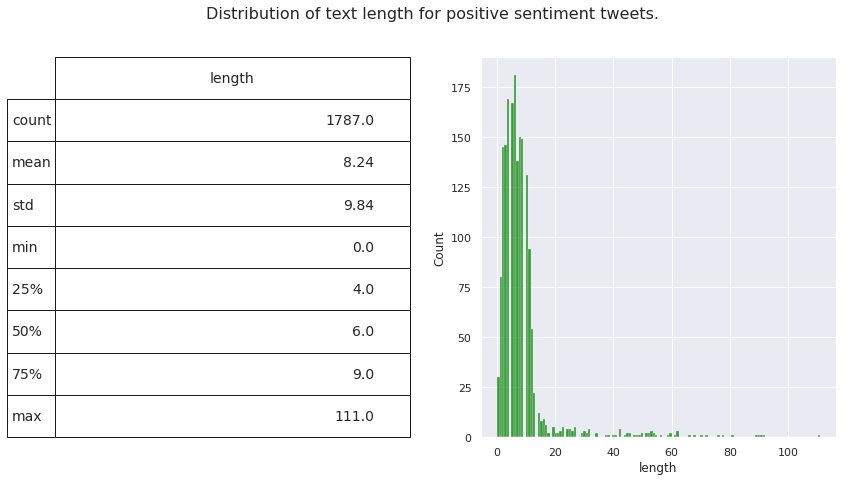

In [ ]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.tweet.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df['length'], ax=ax1,color='green')
describe = df.length.describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for positive sentiment tweets.', fontsize=16)

plt.show()

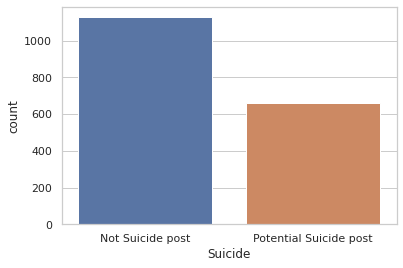

In [ ]:
sns.set_theme(style="whitegrid")
sns.countplot(x=df["Suicide"])

In [ ]:
top = Counter([item for sublist in df['short_word'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
Not_Suicide_post = df[df['Suicide']=='Not Suicide post']
Potential_Suicide_post = df[df['Suicide']=='Potential Suicide post'] 

In [ ]:
top = Counter([item for sublist in Not_Suicide_post['short_word'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Words in Not_Suicide_Post', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
top = Counter([item for sublist in Potential_Suicide_post['short_word'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Words in Potential_Suicide_post', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

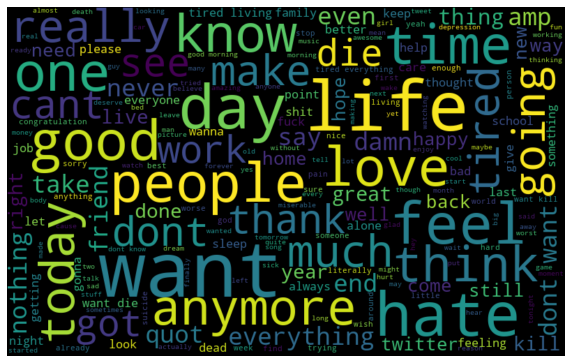

In [ ]:
normal_words =' '.join([text for text in df['tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

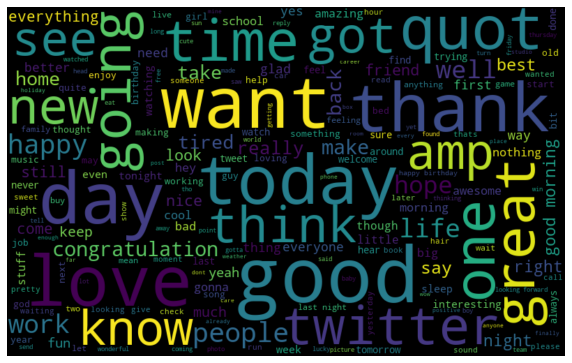

In [ ]:
normal_words =' '.join([text for text in df['tweet'][df['Suicide'] == 'Not Suicide post']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

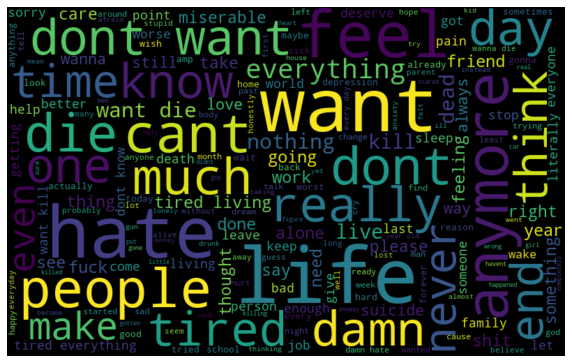

In [ ]:
normal_words =' '.join([text for text in df['tweet'][df['Suicide'] == 'Potential Suicide post']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## **Applying N-gram**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df["tweet"],df["Suicide"], test_size = 0.33, random_state = 42)    
count_vect = CountVectorizer(ngram_range=(1, 2))        
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)

x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

print (x_train_tfidf.shape,x_test_tfidf.shape, y_train.shape, y_test.shape)

(1197, 10192) (590, 10192) (1197,) (590,)


# **Machine Learning Models**

# **Logistic Regression**

In [ ]:
lr = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
lr.fit(x_train_tfidf, y_train)
y_pred1 = lr.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred1)))
print(classification_report(y_test, y_pred1))

Accuracy: 0.8847457627118644
                        precision    recall  f1-score   support

      Not Suicide post       0.87      0.96      0.91       371
Potential Suicide post       0.92      0.75      0.83       219

              accuracy                           0.88       590
             macro avg       0.90      0.86      0.87       590
          weighted avg       0.89      0.88      0.88       590



In [ ]:
scores = cross_val_score(lr, x_train_tfidf,y_train, cv=5)  
print(accuracy_score(y_test,y_pred1))
print ("Cross-validated scores:", scores)

0.8847457627118644
Cross-validated scores: [0.84166667 0.825      0.90376569 0.82845188 0.79916318]


# **Support Vector Machine**

In [ ]:
svc = LinearSVC()
svc.fit(x_train_tfidf, y_train)
y_pred2 = svc.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred2)))
print(classification_report(y_test, y_pred2))

Accuracy: 0.8932203389830509
                        precision    recall  f1-score   support

      Not Suicide post       0.89      0.94      0.92       371
Potential Suicide post       0.89      0.81      0.85       219

              accuracy                           0.89       590
             macro avg       0.89      0.88      0.88       590
          weighted avg       0.89      0.89      0.89       590



In [ ]:
scores = cross_val_score(svc, x_train_tfidf,y_train, cv=5)   
print(accuracy_score(y_test,y_pred2))
print ("Cross-validated scores:", scores)

0.8932203389830509
Cross-validated scores: [0.8875     0.87083333 0.92050209 0.86610879 0.82845188]




## **Naive Bayes(Multinomial)**

In [ ]:
mnb = MultinomialNB()
mnb.fit(x_train_tfidf, y_train)
y_pred3 = mnb.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred3)))
print(classification_report(y_test, y_pred3))

Accuracy: 0.888135593220339
                        precision    recall  f1-score   support

      Not Suicide post       0.86      0.98      0.92       371
Potential Suicide post       0.96      0.73      0.83       219

              accuracy                           0.89       590
             macro avg       0.91      0.85      0.87       590
          weighted avg       0.90      0.89      0.88       590



In [ ]:
scores = cross_val_score(mnb, x_train_tfidf,y_train, cv=5)   
print(accuracy_score(y_test,y_pred3))
print ("Cross-validated scores:", scores)

0.888135593220339
Cross-validated scores: [0.85416667 0.8125     0.90376569 0.82426778 0.79916318]


## **Randomforest**


In [ ]:
rfc = RandomForestClassifier(n_estimators=300, max_depth=15, random_state=42, class_weight='balanced')
rfc.fit(x_train_tfidf,y_train)
y_pred4 = rfc.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred4)))
print(classification_report(y_test, y_pred4))

Accuracy: 0.8711864406779661
                        precision    recall  f1-score   support

      Not Suicide post       0.84      0.98      0.91       371
Potential Suicide post       0.96      0.68      0.80       219

              accuracy                           0.87       590
             macro avg       0.90      0.83      0.85       590
          weighted avg       0.88      0.87      0.87       590



In [ ]:
scores = cross_val_score(rfc, x_train_tfidf,y_train, cv=5)   
print(accuracy_score(y_test,y_pred4))
print ("Cross-validated scores:", scores)

0.8711864406779661
Cross-validated scores: [0.86666667 0.86666667 0.88702929 0.84518828 0.84937238]


# **GradientBoostingClassifier**

In [ ]:
gbc = GradientBoostingClassifier(n_estimators=1000, max_features='auto', max_depth=4, random_state=1, verbose=1)
gbc.fit(x_train_tfidf, y_train)
y_pred5 = gbc.predict(x_test_tfidf)
print(accuracy_score(y_test, y_pred5))
print(classification_report(y_test, y_pred5))

      Iter       Train Loss   Remaining Time 
         1           1.2470           13.29s
         2           1.1914           11.03s
         3           1.1464           10.14s
         4           1.1086            9.69s
         5           1.0770            9.32s
         6           1.0414            9.21s
         7           1.0154            9.15s
         8           0.9869            9.08s
         9           0.9598            9.02s
        10           0.9404            9.04s
        20           0.7876            8.58s
        30           0.6974            8.30s
        40           0.6360            8.03s
        50           0.5855            8.11s
        60           0.5432            8.13s
        70           0.5064            8.01s
        80           0.4755            7.98s
        90           0.4464            7.84s
       100           0.4228            7.82s
       200           0.2797            6.36s
       300           0.2037            5.35s
       40

In [ ]:
scores = cross_val_score(gbc, x_train_tfidf,y_train, cv=5)   
print(accuracy_score(y_test,y_pred5))
print ("Cross-validated scores:", scores)

      Iter       Train Loss   Remaining Time 
         1           1.2472           20.59s
         2           1.1929           17.91s
         3           1.1480           16.99s
         4           1.1100           16.38s
         5           1.0665           16.09s
         6           1.0357           15.81s
         7           1.0070           15.68s
         8           0.9786           15.52s
         9           0.9554           15.43s
        10           0.9315           15.41s
        20           0.7798           14.82s
        30           0.6881           14.59s
        40           0.6204           14.29s
        50           0.5675           14.14s
        60           0.5264           14.02s
        70           0.4865           13.70s
        80           0.4537           13.63s
        90           0.4264           13.41s
       100           0.4035           13.17s
       200           0.2528           11.53s
       300           0.1748           10.24s
       40

## **Ensemble Classifier**

In [ ]:
mnb = MultinomialNB()
rfc= RandomForestClassifier(n_estimators=1000, max_depth=12, random_state=42)
lr = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
svc = SVC(probability=True)
ec=VotingClassifier(estimators=[('Multinominal NB', mnb), ('Random Forest', rfc),('Logistic Regression',lr),('Support Vector Machine',svc)], voting='soft', weights=[1,2,3,4]) 
ec.fit(x_train_tfidf,y_train)                                                 
y_pred6 = ec.predict(x_test_tfidf)
print(accuracy_score(y_test, y_pred6))
print(classification_report(y_test, y_pred6))

0.8949152542372881
                        precision    recall  f1-score   support

      Not Suicide post       0.91      0.92      0.92       371
Potential Suicide post       0.87      0.84      0.86       219

              accuracy                           0.89       590
             macro avg       0.89      0.88      0.89       590
          weighted avg       0.89      0.89      0.89       590



In [ ]:
scores = cross_val_score(ec, x_train_tfidf,y_train, cv=5)  
print(accuracy_score(y_test,y_pred6))
print ("Cross-validated scores:", scores)

0.8949152542372881
Cross-validated scores: [0.9        0.8875     0.92468619 0.87866109 0.86192469]


In [ ]:
mc = count_vect.transform([' i will kill myself'])
m = transformer.transform(mc)
y_pred = ec.predict(m)
print(y_pred)

['Potential Suicide post']


## **AdaBoost with Random Forest Classifier**

In [ ]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=9, random_state=0)
abc= AdaBoostClassifier(base_estimator=rfc, learning_rate=0.2, n_estimators=100)
abc.fit(x_train_tfidf, y_train)                                                   
y_pred7= abc.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test, y_pred7)))
print(classification_report(y_test, y_pred7))

Accuracy: 0.8898305084745762
                        precision    recall  f1-score   support

      Not Suicide post       0.87      0.98      0.92       371
Potential Suicide post       0.95      0.74      0.83       219

              accuracy                           0.89       590
             macro avg       0.91      0.86      0.88       590
          weighted avg       0.90      0.89      0.89       590



In [ ]:
scores = cross_val_score(abc, x_train_tfidf,y_train, cv=5)   
print(accuracy_score(y_test,y_pred7))
print ("Cross-validated scores:", scores)

0.8898305084745762
Cross-validated scores: [0.90833333 0.89166667 0.92050209 0.87866109 0.87029289]


# **Comparison Between ML Models**

In [ ]:
Comparison_unibi = pd.DataFrame({'Logistic Regression': [accuracy_score(y_test,y_pred1)*100,f1_score(y_test,y_pred1,average='macro')*100,recall_score(y_test, y_pred1,average='micro')*100,precision_score(y_test, y_pred1,average='micro')*100],
                            'SVM':[accuracy_score(y_test,y_pred2)*100,f1_score(y_test,y_pred2,average='macro')*100,recall_score(y_test, y_pred2,average='micro')*100,precision_score(y_test, y_pred2,average='micro')*100],
                           'Naive Bayes':[accuracy_score(y_test,y_pred3)*100,f1_score(y_test,y_pred3,average='macro')*100,recall_score(y_test, y_pred3,average='micro')*100,precision_score(y_test, y_pred3,average='micro')*100],
                           'Random Forest':[accuracy_score(y_test,y_pred4)*100,f1_score(y_test,y_pred4,average='macro')*100,recall_score(y_test, y_pred4,average='micro')*100,precision_score(y_test, y_pred4,average='micro')*100],
                           'GradientBoosting':[accuracy_score(y_test,y_pred5)*100,f1_score(y_test,y_pred5,average='macro')*100,recall_score(y_test, y_pred5,average='micro')*100,precision_score(y_test, y_pred5,average='micro')*100],
                           'Ensembled':[accuracy_score(y_test,y_pred6)*100,f1_score(y_test,y_pred6,average='macro')*100,recall_score(y_test, y_pred6,average='micro')*100,precision_score(y_test, y_pred6,average='micro')*100],
                           'Adaboost':[accuracy_score(y_test,y_pred7)*100,f1_score(y_test,y_pred7,average='macro')*100,recall_score(y_test, y_pred7,average='micro')*100,precision_score(y_test, y_pred7,average='micro')*100],

})

In [ ]:
print ('Comparison using uni-gram(1,1)') 
Comparison_uni.rename(index={0:'Accuracy',1:'F1_score', 2: 'Recall',3:'Precision'}, inplace=True)
Comparison_uni.head()

Comparison using uni-gram(1,1)


,Logistic Regression,SVM,Naive Bayes,Random Forest,GradientBoosting,Ensembled,Adaboost
Accuracy,88.983051,89.830508,88.644068,88.474576,88.983051,90.000000,90.000000
F1_score,87.568841,88.761048,87.405814,86.838825,87.632025,88.986234,88.829308
Recall,88.983051,89.830508,88.644068,88.474576,88.983051,90.000000,90.000000
Precision,88.983051,89.830508,88.644068,88.474576,88.983051,90.000000,90.000000


In [ ]:
print ('Comparison using bi-gram(2,2)') 
Comparison_bi.rename(index={0:'Accuracy',1:'F1_score', 2: 'Recall',3:'Precision'}, inplace=True)
Comparison_bi.head()

Comparison using bi-gram(2,2)


,Logistic Regression,SVM,Naive Bayes,Random Forest,GradientBoosting,Ensembled,Adaboost
Accuracy,79.322034,81.864407,81.355932,74.237288,80.169492,82.542373,74.915254
F1_score,74.145486,78.581050,77.354883,65.727039,75.701448,79.811369,66.924242
Recall,79.322034,81.864407,81.355932,74.237288,80.169492,82.542373,74.915254
Precision,79.322034,81.864407,81.355932,74.237288,80.169492,82.542373,74.915254


In [ ]:
print ('Comparison using uni-bi-gram(1,2)') 
Comparison_unibi.rename(index={0:'Accuracy',1:'F1_score', 2: 'Recall',3:'Precision'}, inplace=True)
Comparison_unibi.head()

Comparison using uni-bi-gram(1,2)


,Logistic Regression,SVM,Naive Bayes,Random Forest,GradientBoosting,Ensembled,Adaboost
Accuracy,88.474576,89.322034,88.813559,87.118644,89.152542,89.491525,88.983051
F1_score,87.109460,88.317603,87.260521,85.124932,88.011785,88.679689,87.568841
Recall,88.474576,89.322034,88.813559,87.118644,89.152542,89.491525,88.983051
Precision,88.474576,89.322034,88.813559,87.118644,89.152542,89.491525,88.983051


# **Deep Learning Models**

In [ ]:
vocabulary_size =3000
max_text_len = 60
tokenizer = Tokenizer(num_words=vocabulary_size)
tokenizer.fit_on_texts(df['Tweet'].values)
le=len(tokenizer.word_index)+1
sequences = tokenizer.texts_to_sequences(df['Tweet'].values)
X_DeepLearning = pad_sequences(sequences, maxlen=max_text_len)
X_DeepLearning.shape[1]

60

In [ ]:
df.loc[df['Suicide'] == 'Potential Suicide post' , 'LABEL'] = 0     
df.loc[df['Suicide'] == 'Not Suicide post', 'LABEL'] = 1              
     
labels = to_categorical(df['LABEL'], num_classes=2)
print(labels[:])

[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [ ]:
XX_train, XX_test, y_train, y_test = train_test_split(X_DeepLearning , labels, test_size=0.25, random_state=42)
print((XX_train.shape, y_train.shape, XX_test.shape, y_test.shape))

((1340, 60), (1340, 2), (447, 60), (447, 2))


# **LSTM 1-Layer**

In [ ]:
epochs = 10
emb_dim = 120
batch_size = 50       
model_lstm1 = Sequential()
model_lstm1.add(Embedding(vocabulary_size,emb_dim, input_length=X_DeepLearning.shape[1]))
model_lstm1.add(SpatialDropout1D(0.8))                                             
model_lstm1.add(Bidirectional(LSTM(300, dropout=0.5, recurrent_dropout=0.5)))                 
model_lstm1.add(Dropout(0.5))
model_lstm1.add(Flatten())
model_lstm1.add(Dense(64, activation='relu'))
model_lstm1.add(Dropout(0.5))
model_lstm1.add(Dense(2, activation='softmax'))
model_lstm1.compile(optimizer=tf.optimizers.Adam(),loss='binary_crossentropy', metrics=['acc']) 
print(model_lstm1.summary())                                                                        
history_lstm1 = model_lstm1.fit(XX_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2)

results_1 = model_lstm1.evaluate(XX_test, y_test, verbose=False)
print(f'Test results - Loss: {results_1[0]} - Accuracy: {100*results_1[1]}%')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 60, 120)           360000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 60, 120)          0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 600)              1010400   
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 600)               0         
                                                                 
 flatten (Flatten)           (None, 600)               0         
                                                                 
 dense (Dense)               (None, 64)                3

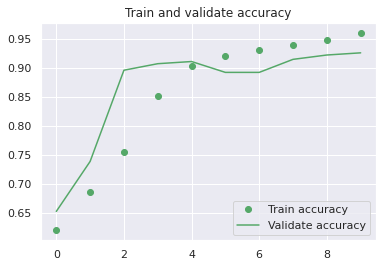

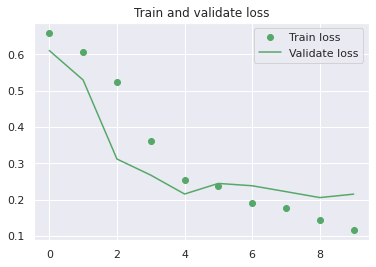

In [ ]:
acc = history_lstm1.history['acc']                        
val_acc = history_lstm1.history['val_acc']
loss = history_lstm1.history['loss']
val_loss = history_lstm1.history['val_loss']
plt.plot( acc, 'go', label='Train accuracy')
plt.plot( val_acc, 'g', label='Validate accuracy')
plt.title('Train and validate accuracy')
plt.legend()                                           

plt.figure()
plt.plot( loss, 'go', label='Train loss')
plt.plot( val_loss, 'g', label='Validate loss')
plt.title('Train and validate loss')
plt.legend()
plt.show()

In [ ]:
from keras.models import load_model
    
#model_lstm1.save('/content/drive/MyDrive/models/lstm 1-layer.h5') 
model = load_model('/content/drive/MyDrive/models/lstm 1-layer.h5')
twt = ['i will kill myself. maybe i am not good enough to live.']
twt = tokenizer.texts_to_sequences(twt)
twt = pad_sequences(twt, maxlen=60, dtype='int32')

predicted = model.predict(twt,batch_size=1,verbose = True)
if(np.argmax(predicted) == 0):
    print("Potential Suicide Post")
elif (np.argmax(predicted) == 1):
    print("Non Suicide Post")

1/1 [==============================] - 1s 842ms/step
Potential Suicide Post


## **LSTM 2-Layers**

In [ ]:
epochs = 10
emb_dim = 120                     
batch_size = 50                
model_lstm2 = Sequential()            
model_lstm2.add(Embedding(vocabulary_size,emb_dim ,input_length=X_DeepLearning.shape[1]))
model_lstm2.add(SpatialDropout1D(0.8))
model_lstm2.add(Bidirectional(LSTM(200, dropout=0.5, recurrent_dropout=0.5, return_sequences= True)))
model_lstm2.add(Dropout(0.5))
model_lstm2.add(Bidirectional(LSTM(300, dropout=0.5, recurrent_dropout =0.5)))
model_lstm2.add(Dropout(0.5))
model_lstm2.add(Flatten())
model_lstm2.add(Dense(64, activation='relu'))
model_lstm2.add(Dropout(0.5))
model_lstm2.add(Dense(2, activation='softmax'))
model_lstm2.compile(optimizer=tf.optimizers.Adam(),loss='binary_crossentropy', metrics=['acc']) 
print(model_lstm2.summary())                                                                           
history_lstm2 = model_lstm2.fit(XX_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2)

results_2 = model_lstm2.evaluate(XX_test, y_test, verbose=False)
print(f'Test results - Loss: {results_2[0]} - Accuracy: {100*results_2[1]}%')

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 60, 120)           360000    
                                                                 
 spatial_dropout1d_8 (Spatia  (None, 60, 120)          0         
 lDropout1D)                                                     
                                                                 
 bidirectional_9 (Bidirectio  (None, 60, 400)          513600    
 nal)                                                            
                                                                 
 dropout_19 (Dropout)        (None, 60, 400)           0         
                                                                 
 bidirectional_10 (Bidirecti  (None, 600)              1682400   
 onal)                                                           
                                                      

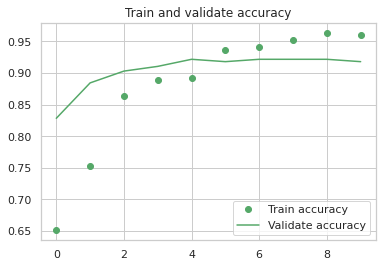

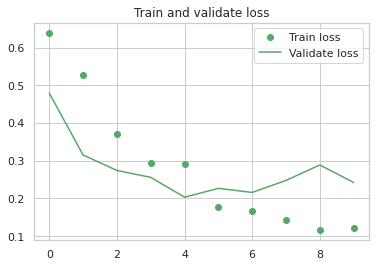

In [ ]:
acc = history_lstm2.history['acc']                          
val_acc = history_lstm2.history['val_acc']
loss = history_lstm2.history['loss']
val_loss = history_lstm2.history['val_loss']

plt.plot( acc, 'go', label='Train accuracy')
plt.plot( val_acc, 'g', label='Validate accuracy')
plt.title('Train and validate accuracy')
plt.legend()                                            

plt.figure()

plt.plot( loss, 'go', label='Train loss')
plt.plot( val_loss, 'g', label='Validate loss')
plt.title('Train and validate loss')
plt.legend()

plt.show() 

In [ ]:
from keras.models import load_model
    
#model_lstm2.save('/content/drive/MyDrive/models/lstm 2-layer.h5') 
model = load_model('/content/drive/MyDrive/models/lstm 2-layer.h5')
twt = ['i will kill myself. maybe i am not good enough to live.']
twt = tokenizer.texts_to_sequences(twt)
twt = pad_sequences(twt, maxlen=60, dtype='int32')

predicted = model.predict(twt,batch_size=1,verbose = True)
if(np.argmax(predicted) == 0):
    print("Potential Suicide Post")
elif (np.argmax(predicted) == 1):
    print("Non Suicide Post")

1/1 [==============================] - 1s 784ms/step
Potential Suicide Post


## **GRU**

In [ ]:
epochs = 10
emb_dim = 80                     
batch_size = 50                
model_gru = Sequential()            
model_gru.add(Embedding(vocabulary_size,emb_dim ,input_length=X_DeepLearning.shape[1]))
model_gru.add(SpatialDropout1D(0.8))
model_gru.add(GRU(units=32,  dropout=0.2, recurrent_dropout=0.2))
model_gru.add(Dropout(0.5))
model_gru.add(Dense(64, activation='relu'))
model_gru.add(Dropout(0.5))
model_gru.add(Dense(2, activation='softmax'))
model_gru.compile(optimizer=tf.optimizers.Adam(),loss='binary_crossentropy', metrics=['acc']) 
print(model_gru.summary())                                                                           
history_gru = model_gru.fit(XX_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2)

results_3 = model_gru.evaluate(XX_test, y_test, verbose=False)
print(f'Test results - Loss: {results_3[0]} - Accuracy: {100*results_3[1]}%')

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 60, 80)            240000    
                                                                 
 spatial_dropout1d_9 (Spatia  (None, 60, 80)           0         
 lDropout1D)                                                     
                                                                 
 gru (GRU)                   (None, 32)                10944     
                                                                 
 dropout_22 (Dropout)        (None, 32)                0         
                                                                 
 dense_21 (Dense)            (None, 64)                2112      
                                                                 
 dropout_23 (Dropout)        (None, 64)                0         
                                                      

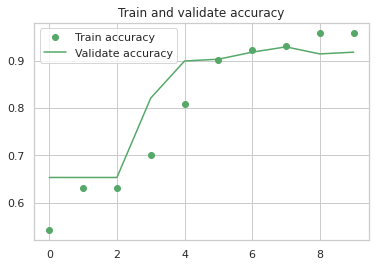

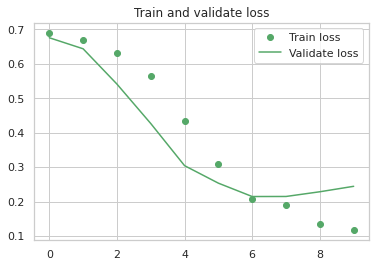

In [ ]:
acc = history_gru.history['acc']                          
val_acc = history_gru.history['val_acc']
loss = history_gru.history['loss']
val_loss = history_gru.history['val_loss']

plt.plot( acc, 'go', label='Train accuracy')
plt.plot( val_acc, 'g', label='Validate accuracy')
plt.title('Train and validate accuracy')
plt.legend()                                            

plt.figure()

plt.plot( loss, 'go', label='Train loss')
plt.plot( val_loss, 'g', label='Validate loss')
plt.title('Train and validate loss')
plt.legend()

plt.show() 

In [ ]:
from keras.models import load_model
    
#model_gru.save('/content/drive/MyDrive/models/GRU.h5') 
model = load_model('/content/drive/MyDrive/models/GRU.h5')
twt = ['i will kill myself. maybe i am not good enough to live.']
twt = tokenizer.texts_to_sequences(twt)
twt = pad_sequences(twt, maxlen=60, dtype='int32')

predicted = model.predict(twt,batch_size=1,verbose = True)
if(np.argmax(predicted) == 0):
    print("Potential Suicide Post")
elif (np.argmax(predicted) == 1):
    print("Non Suicide Post")

1/1 [==============================] - 0s 286ms/step
Potential Suicide Post


## **CNN+LSTM**

In [ ]:
epochs = 10
emb_dim = 80                                                                 
batch_size = 50
model_cl = Sequential()
model_cl.add(Embedding(vocabulary_size,emb_dim, input_length=X_DeepLearning.shape[1]))
model_cl.add(SpatialDropout1D(0.8))
model_cl.add(Conv1D(filters=64, kernel_size=6, padding='same', activation='relu'))
model_cl.add(MaxPooling1D(pool_size=2))
model_cl.add(Conv1D(filters=32, kernel_size=6, activation='relu'))
model_cl.add(MaxPooling1D(pool_size=2))
model_cl.add(Bidirectional(LSTM(100, dropout=0.5, recurrent_dropout=0.5, return_sequences=True)))
model_cl.add(Dropout(0.5))
model_cl.add(Bidirectional(LSTM(400, dropout=0.5, recurrent_dropout=0.5)))
model_cl.add(Dropout(0.5))
model_cl.add(Flatten())
model_cl.add(Dense(64, activation='relu'))
model_cl.add(Dropout(0.5))
model_cl.add(Dense(2, activation='softmax'))
model_cl.compile(optimizer='adam',loss='binary_crossentropy', metrics=['acc'])
print(model_cl.summary())                                                                           
history_cl = model_cl.fit(XX_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)

results_4 = model_cl.evaluate(XX_test, y_test, verbose=False)
print(f'Test results - Loss: {results_4[0]} - Accuracy: {100*results_4[1]}%')

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 60, 80)            240000    
                                                                 
 spatial_dropout1d_12 (Spati  (None, 60, 80)           0         
 alDropout1D)                                                    
                                                                 
 conv1d_4 (Conv1D)           (None, 60, 64)            30784     
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 30, 64)           0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 25, 32)            12320     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 12, 32)         

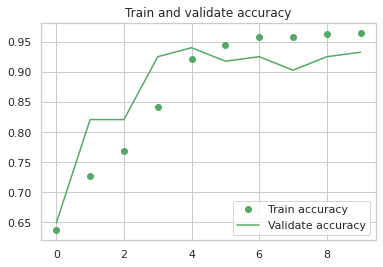

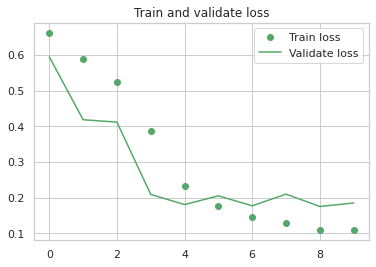

In [ ]:
acc = history_cl.history['acc']                          
val_acc = history_cl.history['val_acc']
loss = history_cl.history['loss']
val_loss = history_cl.history['val_loss']
plt.plot( acc, 'go', label='Train accuracy')
plt.plot( val_acc, 'g', label='Validate accuracy')
plt.title('Train and validate accuracy')
plt.legend()                                           

plt.figure()
plt.plot( loss, 'go', label='Train loss')
plt.plot( val_loss, 'g', label='Validate loss')
plt.title('Train and validate loss')
plt.legend()
plt.show() 

In [ ]:
from keras.models import load_model
    
#model_cl.save('/content/drive/MyDrive/models/CNN+LSTM.h5') 
model = load_model('/content/drive/MyDrive/models/CNN+LSTM.h5')
twt = ['today i almost kill myself cause i get hitted by a bus']
twt = tokenizer.texts_to_sequences(twt)
twt = pad_sequences(twt, maxlen=60, dtype='int32')

predicted = model.predict(twt,batch_size=1,verbose = True)
if(np.argmax(predicted) == 0):
    print("Potential Suicide Post")
elif (np.argmax(predicted) == 1):
    print("Non Suicide Post")

1/1 [==============================] - 5s 5s/step
Non Suicide Post


## **Model Comparision**

In [ ]:
results=pd.DataFrame({'Model':['LSTM-1 Layer','LSTM-2 Layer','GRU','CNN+LSTM'],
                     'Accuracy Score':[results_1[1],results_2[1],results_3[1],results_4[1]]})
result_df=results.sort_values(by='Accuracy Score', ascending=False)
result_df=result_df.set_index('Model')
result_df

,Accuracy Score
Model,
LSTM-2 Layer,0.941834
LSTM-1 Layer,0.939597
CNN+LSTM,0.935123
GRU,0.928412


## **Bert Model**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['Tweet'], df['Suicide'], test_size=0.33, random_state=42)

In [ ]:
X_train = X_train.tolist()
X_test = X_test.tolist()
y_train = y_train.tolist()
y_test = y_test.tolist()

In [ ]:
class_names = ['Potential Suicide post', 'Not Suicide post']

In [ ]:
(x_train,y_train), (x_val,y_val), preproc = text.texts_from_array(x_train=X_train, y_train=y_train,
                                                                       x_test=X_test, y_test=y_test,
                                                                       class_names=class_names,
                                                                       preprocess_mode='bert',
                                                                       maxlen=120, 
                                                                       max_features=5000)

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


/usr/local/lib/python3.8/dist-packages/ktrain/utils.py:745: UserWarning:

class_names argument was ignored, as they were extracted from string labels in dataset



task: text classification


In [ ]:
model = text.text_classifier('bert', train_data=(x_train,y_train), preproc=preproc)

Is Multi-Label? False
maxlen is 120
done.


In [ ]:
learner = ktrain.get_learner(model, train_data=(x_train,y_train), 
                             val_data=(x_val,y_val),
                             batch_size=16)

In [ ]:
learner.fit_onecycle(2e-5, 3)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/3
75/75 [==============================] - 59s 515ms/step - loss: 0.4414 - accuracy: 0.8237 - val_loss: 0.2550 - val_accuracy: 0.9136
Epoch 2/3
75/75 [==============================] - 35s 470ms/step - loss: 0.1494 - accuracy: 0.9482 - val_loss: 0.1916 - val_accuracy: 0.9373
Epoch 3/3
75/75 [==============================] - 35s 465ms/step - loss: 0.0533 - accuracy: 0.9850 - val_loss: 0.1270 - val_accuracy: 0.9644


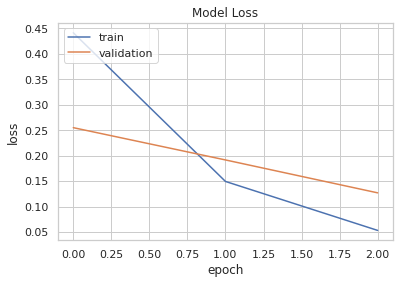

In [ ]:
learner.plot()

In [ ]:
learner.validate(val_data=(x_val,y_val), class_names=class_names)

19/19 [==============================] - 8s 243ms/step
                        precision    recall  f1-score   support

Potential Suicide post       0.98      0.96      0.97       371
      Not Suicide post       0.94      0.97      0.95       219

              accuracy                           0.96       590
             macro avg       0.96      0.97      0.96       590
          weighted avg       0.96      0.96      0.96       590



array([[357,  14],
       [  7, 212]])

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)
predictor.get_classes()

['Not Suicide post', 'Potential Suicide post']

In [ ]:
message = 'i will kill myself'
prediction = predictor.predict(message)
print('predicted: {}'.format(prediction))

1/1 [==============================] - 0s 46ms/step
predicted: Potential Suicide post


**Save Bert Model**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
predictor.save("/content/drive/MyDrive/models/bert_model_Suicide(Snigdho)")

**Load Saved Model**

In [ ]:
predictor1 = ktrain.load_predictor('/content/drive/MyDrive/models/bert_model_Suicide(Snigdho)')

data = "Few days ago I lost my job, my family left me. I've no purpose here to live."
predictor1.predict(data)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:299: UserWarning: Trying to unpickle estimator LabelEncoder from version 1.0.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


1/1 [==============================] - 5s 5s/step


'Potential Suicide post'